In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading the raw dataset
df = pd.read_csv("Dataset/New Dataset half million.csv")

In [3]:
# printing the head of the loan recommend dataset which is in the form of dataframe.
df.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country
0,0060K00000RW5M4QAL,0010K00001fghU0QAI,75,73,Living Expenses,4,200,4.571,Weekly,Loan Paid,53,6500.0,NaN,Whittlesea,VIC,Australia
1,0062x00000AkpZnAAJ,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.429,Weekly,Loan Paid,53,6500.0,14429.94,Whittlesea,VIC,Australia
2,0062x00000AHV4lAAH,0010K00001fghU0QAI,75,73,Living Expenses,10,200,11.429,Weekly,Loan Paid,53,6500.0,9924.14,Whittlesea,VIC,Australia
3,0062x000009Ua6WAAS,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.286,Weekly,Loan Paid,53,6500.0,14683.88,Whittlesea,VIC,Australia
4,0062x000008zdrUAAQ,0010K00001fghU0QAI,75,73,Living Expenses,6,200,6.571,Weekly,Loan Paid,53,6500.0,8691.38,Whittlesea,VIC,Australia


In [4]:
df.shape

(514658, 16)

In [5]:
# Dropping columns because these columns are of no use for use.
# we only need columns like userId, loanId, Amount, Repayment_time, etc.
# StageName ==>  all the StageName are same i.e. "Loan Paid".
# df.drop(["Contact__c", "Min_IT_Loan_ID__c", "Opp_Number__c","StageName"], axis=1,inplace=True)
# IMPORTANT : Here all StageNames were not same we have some variation of stagenames.

In [6]:
# printing the describe able metric of the dataframe to get few insights about the data
df.describe()

,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Applicant Age,summary_income,summary_income_cv
count,514658.000000,514658.000000,514658.000000,514658.000000,514658.000000,514658.000000,5.146580e+05,4.920400e+05
mean,12.508102,11.688525,7.633353,930.842521,11.298860,40.111315,5.820032e+03,6.497261e+03
std,8.276191,8.237319,5.036140,857.564911,5.731782,10.658488,2.730689e+05,1.667604e+04
min,3.000000,3.000000,1.000000,100.000000,-46.857000,0.000000,0.000000e+00,-3.782050e+03
25%,6.000000,6.000000,5.000000,350.000000,7.857000,32.000000,1.213330e+03,3.892400e+03
50%,10.000000,9.000000,6.000000,550.000000,10.000000,39.000000,3.185000e+03,5.327520e+03
75%,16.000000,15.000000,10.000000,1200.000000,14.000000,47.000000,4.333330e+03,7.516653e+03
max,75.000000,73.000000,45.000000,5000.000000,153.429000,87.000000,8.714009e+07,8.228670e+06


### Converting the data into canonical foramt


It is important to convert the data into a canonical format. We would like to consider data for only those users for this recommendation engine who have taken at least 3 loans and serviced them to completion. Also, we would form data for only those Loan-IDs that have been given at least 5 times. This will ensure that we are working with some amount of data in the system and our recommendation will not be plagued with cold-start problem for our machine model and also, we have some active valid interactions as the basis for this intelligence that we are building.

In [7]:
# consider data for only those :  
#     --> users taken at least 3 loans & serviced them to completion.  
# df = df[df["Num_Of_Loans_Paid__c"]>=3]
# the minimum value of "Num_Of_Loans_Paid__c" this column is already 3 

In [8]:
# checking for the possibility of null values if null values exists in dataset then we need to handle them 
df.isnull().sum()

Id                                0
AccountID                         0
Number_Of_Loans_Granted__c        0
Num_Of_Loans_Paid__c              0
Purpose_of_Loan__c               19
Total_Repayments__c               0
Amount                            0
Term_in_Weeks__c                  0
Payment_Frequency__c              0
StageName                         0
Applicant Age                     0
summary_income                    0
summary_income_cv             22618
city                           2367
state                             0
Country                           0
dtype: int64

In [9]:
# filling NA values with its mean if they exists

# NA values exists for 3 features Purpose_of_Loan__c, summary_income_cv, city

In [10]:
# Imputing the feature Purpose_of_Loan_C
# But the feaature is not playing an important role in our system. we can possibly ignore it. 
# But if in case we wanted to impute we can impute using mode
# df['Purpose_of_Loan__c'].fillna(df['Purpose_of_Loan__c'].mode(), inplace=True)

In [11]:
# Imputing the feature city
# Group by 'state' and fill missing 'city' values with the mode of the corresponding state
df['city'] = df.groupby('state')['city'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [12]:
# df['summary_income_cv'].fillna(df['summary_income_cv'].mean(), inplace=True)

# Imputing 0 to the summary_income_cv because it is possible that the field is empty because the user's income is nonexistent.

df.fillna({'summary_income_cv': 0}, inplace=True)

In [13]:
df.isnull().sum()

Id                             0
AccountID                      0
Number_Of_Loans_Granted__c     0
Num_Of_Loans_Paid__c           0
Purpose_of_Loan__c            19
Total_Repayments__c            0
Amount                         0
Term_in_Weeks__c               0
Payment_Frequency__c           0
StageName                      0
Applicant Age                  0
summary_income                 0
summary_income_cv              0
city                           0
state                          0
Country                        0
dtype: int64

In [14]:
# describing the dataframe metrices after thansformation (if exists for null values)
df.describe()

,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Applicant Age,summary_income,summary_income_cv
count,514658.000000,514658.000000,514658.000000,514658.000000,514658.000000,514658.000000,5.146580e+05,5.146580e+05
mean,12.508102,11.688525,7.633353,930.842521,11.298860,40.111315,5.820032e+03,6.211721e+03
std,8.276191,8.237319,5.036140,857.564911,5.731782,10.658488,2.730689e+05,1.635979e+04
min,3.000000,3.000000,1.000000,100.000000,-46.857000,0.000000,0.000000e+00,-3.782050e+03
25%,6.000000,6.000000,5.000000,350.000000,7.857000,32.000000,1.213330e+03,3.691713e+03
50%,10.000000,9.000000,6.000000,550.000000,10.000000,39.000000,3.185000e+03,5.180750e+03
75%,16.000000,15.000000,10.000000,1200.000000,14.000000,47.000000,4.333330e+03,7.376950e+03
max,75.000000,73.000000,45.000000,5000.000000,153.429000,87.000000,8.714009e+07,8.228670e+06


In [15]:
df.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country
0,0060K00000RW5M4QAL,0010K00001fghU0QAI,75,73,Living Expenses,4,200,4.571,Weekly,Loan Paid,53,6500.0,0.00,Whittlesea,VIC,Australia
1,0062x00000AkpZnAAJ,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.429,Weekly,Loan Paid,53,6500.0,14429.94,Whittlesea,VIC,Australia
2,0062x00000AHV4lAAH,0010K00001fghU0QAI,75,73,Living Expenses,10,200,11.429,Weekly,Loan Paid,53,6500.0,9924.14,Whittlesea,VIC,Australia
3,0062x000009Ua6WAAS,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.286,Weekly,Loan Paid,53,6500.0,14683.88,Whittlesea,VIC,Australia
4,0062x000008zdrUAAQ,0010K00001fghU0QAI,75,73,Living Expenses,6,200,6.571,Weekly,Loan Paid,53,6500.0,8691.38,Whittlesea,VIC,Australia


In [16]:
len(df['AccountID'].unique()) , len(df['Id'].unique())

(59174, 437242)

In [17]:
# we need to convert the alpha-numeric AccountID and LoanId into the numeric form because the ALS model only works
#     with int values of loans and users ID.
AccountMapperobj = {ele: count for count, ele in enumerate(sorted(list(set(df['AccountID']))), 1)}
LoanMapperobj = {ele: count for count, ele in enumerate(sorted(list(set(df['Id']))), 1) }

In [18]:
# creating the dataframe of userId(alpha-numeric) and their unique userIds 
accId,accindex = [],[]
[(accId.append(key),accindex.append(val)) for key,val in AccountMapperobj.items()]
AccountMapperDf = pd.DataFrame({"accountId":accId,
                                "accountIndex":accindex})
# creating the dataframe of loanId(alpha-numeric) and their unique loanIds 
lonId,lonindex = [],[]
[(lonId.append(key),lonindex.append(val)) for key,val in LoanMapperobj.items()]
LoanMapperDf = pd.DataFrame({"LoanId":lonId,
                                "loanIndex":lonindex})

In [19]:
# saving the loanId and userID so that these loanId and userID could be furter used for same user as our data increases.
import os
# File path to save the userID and loanID
file_path,loan_file_path = r"MappingFiles\AccountMapperDf.csv",r"MappingFiles\LoanMapperDf.csv"

# Check if the file exists
if os.path.exists(file_path) and os.path.exists(loan_file_path):
    # Delete the existing file
    os.remove(file_path)
    os.remove(loan_file_path)
    print(f"File '{file_path} and {loan_file_path}' deleted.")

AccountMapperDf.to_csv(file_path,index=False)
LoanMapperDf.to_csv(loan_file_path,index=False)

print(f"New files '{file_path}' and '{loan_file_path}' created.")

File 'MappingFiles\AccountMapperDf.csv and MappingFiles\LoanMapperDf.csv' deleted.
New files 'MappingFiles\AccountMapperDf.csv' and 'MappingFiles\LoanMapperDf.csv' created.


In [20]:
# applying the accountID and loanID for the current dataset. 
df['userId'] = df['AccountID'].map(AccountMapperobj)
df['loanId'] = df['Id'].map(LoanMapperobj)

In [21]:
# after apply the mapper onto the dataframe preview of dataset
df.head(10)

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country,userId,loanId
0,0060K00000RW5M4QAL,0010K00001fghU0QAI,75,73,Living Expenses,4,200,4.571,Weekly,Loan Paid,53,6500.0,0.00,Whittlesea,VIC,Australia,1832,4928
1,0062x00000AkpZnAAJ,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.429,Weekly,Loan Paid,53,6500.0,14429.94,Whittlesea,VIC,Australia,1832,257417
2,0062x00000AHV4lAAH,0010K00001fghU0QAI,75,73,Living Expenses,10,200,11.429,Weekly,Loan Paid,53,6500.0,9924.14,Whittlesea,VIC,Australia,1832,222707
3,0062x000009Ua6WAAS,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.286,Weekly,Loan Paid,53,6500.0,14683.88,Whittlesea,VIC,Australia,1832,195577
4,0062x000008zdrUAAQ,0010K00001fghU0QAI,75,73,Living Expenses,6,200,6.571,Weekly,Loan Paid,53,6500.0,8691.38,Whittlesea,VIC,Australia,1832,167272
5,0062x0000047ru6AAA,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.429,Weekly,Loan Paid,53,6500.0,11736.20,Whittlesea,VIC,Australia,1832,98259
6,0062x0000047eHtAAI,0010K00001fghU0QAI,75,73,Living Expenses,10,200,9.857,Weekly,Loan Paid,53,6500.0,11462.86,Whittlesea,VIC,Australia,1832,97663
7,0062x0000037JUeAAM,0010K00001fghU0QAI,75,73,Living Expenses,6,200,6.571,Weekly,Loan Paid,53,6500.0,10579.48,Whittlesea,VIC,Australia,1832,92042
8,0062x000002ZIPDAA4,0010K00001fghU0QAI,75,73,Living Expenses,4,200,4.000,Weekly,Loan Paid,53,6500.0,24283.34,Whittlesea,VIC,Australia,1832,78151
9,0062x000002ZDr5AAG,0010K00001fghU0QAI,75,73,Living Expenses,4,200,4.000,Weekly,Loan Paid,53,6500.0,13156.75,Whittlesea,VIC,Australia,1832,77779


In [22]:
len(df['userId'].unique()) , len(df['loanId'].unique())

(59174, 437242)

In [23]:
df.describe()

,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Applicant Age,summary_income,summary_income_cv,userId,loanId
count,514658.000000,514658.000000,514658.000000,514658.000000,514658.000000,514658.000000,5.146580e+05,5.146580e+05,514658.000000,514658.000000
mean,12.508102,11.688525,7.633353,930.842521,11.298860,40.111315,5.820032e+03,6.211721e+03,25007.805366,212713.377915
std,8.276191,8.237319,5.036140,857.564911,5.731782,10.658488,2.730689e+05,1.635979e+04,15679.277544,126725.977223
min,3.000000,3.000000,1.000000,100.000000,-46.857000,0.000000,0.000000e+00,-3.782050e+03,1.000000,1.000000
25%,6.000000,6.000000,5.000000,350.000000,7.857000,32.000000,1.213330e+03,3.691713e+03,12379.000000,101996.250000
50%,10.000000,9.000000,6.000000,550.000000,10.000000,39.000000,3.185000e+03,5.180750e+03,23979.000000,209102.000000
75%,16.000000,15.000000,10.000000,1200.000000,14.000000,47.000000,4.333330e+03,7.376950e+03,36451.000000,322502.750000
max,75.000000,73.000000,45.000000,5000.000000,153.429000,87.000000,8.714009e+07,8.228670e+06,59174.000000,437242.000000


we are working with some amount of data in the system and our recommendation will not be 
plagued with cold-start problem for our machine model and also, we have some active valid interactions as the basis for this intelligence 
that we are building.
Based on the above description, we can create a representation of user-loan interaction matrix using cumulative data.


Cumulative Data Option: Each cell signifying how many times it has been taken. It will be a sum total of all the successful and unsuccessful 
servicing of that specific loan. A negative number would indicate it was served unsuccessfully more than it was served successfully. So, if a
loan was taken 5 times with 4 of them being serviced successfully and 1 as unsuccessful loan then the overall count should indicate “3” in that
particular cell (Count = 1 + 1 + 1 + 1 + (-1) = 3).  We will have a “NaN” for not having been taken at all if there is no data for a specific 
user-loan interaction.

#### we need to update the "Number_Of_Loans_Granted__c" column by decreasing the number by total number of loans row found with "Closed Won-Funded" in the StageName column

In [24]:
df1 = pd.DataFrame(columns=df.columns)

In [25]:
for _, group in df.groupby("AccountID"):
    group = pd.DataFrame(group, columns=df.columns)
    
    Cld_Won_Fd_grp = group.loc[group['StageName'] == 'Closed Won-Funded']
    Cld_Won_Pt_Fad_grp = group.loc[group['StageName'] == 'Closed Won-Payment Failed']
    Pt_Pn_grp = group.loc[group['StageName'] == 'Payment Plan']
    Dt_Mt_grp = group.loc[group['StageName'] == 'Debt Management']
    if Cld_Won_Fd_grp.shape[0]>0:
        actual_loans_granted = group.Number_Of_Loans_Granted__c.values[0] - Cld_Won_Fd_grp.shape[0]    
        group['Number_Of_Loans_Granted__c'] = actual_loans_granted
    if Cld_Won_Pt_Fad_grp.shape[0]>0:
        actual_loans_granted = group.Number_Of_Loans_Granted__c.values[0] - Cld_Won_Pt_Fad_grp.shape[0]
        group['Number_Of_Loans_Granted__c'] = actual_loans_granted
    if Pt_Pn_grp.shape[0]>0:
        actual_loans_granted = group.Number_Of_Loans_Granted__c.values[0] - Pt_Pn_grp.shape[0]
        group['Number_Of_Loans_Granted__c'] = actual_loans_granted
    if Dt_Mt_grp.shape[0]>0:
        actual_loans_granted = group.Number_Of_Loans_Granted__c.values[0] - Dt_Mt_grp.shape[0]
        group['Number_Of_Loans_Granted__c'] = actual_loans_granted 
    df1 = pd.concat([df1, group], ignore_index=True)

C:\Users\Ritik.Raghuwanshi\AppData\Local\Temp\ipykernel_2000\828427764.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df1, group], ignore_index=True)


In [26]:
df1.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country,userId,loanId
0,0062x00000DsEQcAAN,0010K00001ayVHPQA2,27,27,Furniture or Appliances,10,500,10.143,Weekly,Loan Paid,55,2166.67,5750.70,Jimboomba,QLD,Australia,1,385865
1,0062x00000ExrNgAAJ,0010K00001ayVHPQA2,27,27,Furniture or Appliances,15,500,14.714,Weekly,Closed Won-Funded,55,2166.67,6348.38,Jimboomba,QLD,Australia,1,416858
2,0062x00000471C0AAI,0010K00001ayVHPQA2,27,27,Furniture or Appliances,10,700,10.000,Weekly,Loan Paid,55,2166.67,3901.44,Jimboomba,QLD,Australia,1,96163
3,0060K00000QSYfLQAX,0010K00001ayVHPQA2,27,27,Vehicle Expenses,10,800,10.000,Weekly,Loan Paid,55,2166.67,0.00,Jimboomba,QLD,Australia,1,102
4,0060K00000SvU4QQAV,0010K00001ayVHPQA2,27,27,Furniture or Appliances,10,800,10.000,Weekly,Loan Paid,55,2166.67,0.00,Jimboomba,QLD,Australia,1,10278


In [27]:
df1.shape

(514658, 18)

In [28]:
df1Copy = df1.copy()

In [29]:
df1.drop(df1[df1['StageName'] == 'Closed Won-Funded'].index, inplace=True)
df1.drop(df1[df1['StageName'] == 'Debt Management'].index, inplace=True)
df1.drop(df1[df1['StageName'] == 'Payment Plan'].index, inplace=True)
df1.drop(df1[df1['StageName'] ==  'Closed Won-Payment Failed'].index, inplace=True)

In [30]:
df1['StageName'].value_counts()

StageName
Loan Paid               467793
Bad Debt Written Off     11653
Bad Debt Watch            1052
Bad Debt Pending           526
Closed Lost                 23
Closed Won                  22
Loan Settled                 1
Hardship                     1
Name: count, dtype: int64

In [31]:
len(df1[df1['StageName'] ==  'Closed Won-Payment Failed'].index)

0

<Axes: >

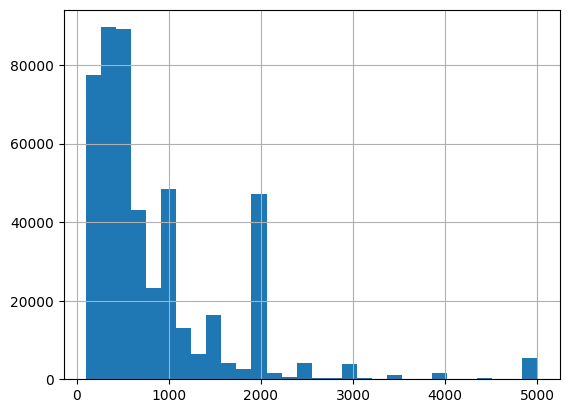

In [32]:
df1['Amount'].hist(bins=30)

In [33]:
df1['StageName'].unique()

array(['Loan Paid', 'Bad Debt Written Off', 'Bad Debt Watch',
       'Bad Debt Pending', 'Closed Lost', 'Closed Won', 'Loan Settled',
       'Hardship'], dtype=object)

In [34]:
df1['StageName'].value_counts()

StageName
Loan Paid               467793
Bad Debt Written Off     11653
Bad Debt Watch            1052
Bad Debt Pending           526
Closed Lost                 23
Closed Won                  22
Loan Settled                 1
Hardship                     1
Name: count, dtype: int64

In [35]:
df1.shape

(481071, 18)

# Creating the Ratings columns

In [36]:
# Applying the Cumulative Data Option:sum of all the successful subtraction unsuccessful servicing of specific loan.
df1['count'] = (df1['Num_Of_Loans_Paid__c'] - (df1['Number_Of_Loans_Granted__c'] - df1['Num_Of_Loans_Paid__c']))

In [37]:
# creating an function to perform the transformation of count column
#     if count <1                  ==> 0
#     if count >= 1 and count<=10  ==> 1
#     if count >10 and count <100  ==> int(str(x)[0])+1  [43:4, 79:7, 91:9]
#     if count >100                ==> 10
# so by this transformation 0 to 10

def applyRangefunc(x):
    if x<=10 and x>=1:
        return 1
    elif x>10 and x<100:
        return int(str(x)[0])+1
    elif x>=100:
        return 10
    else:
        return x

In [38]:
# Run this cell only once because if this is runned twice it will convert to false ratings
df1['count'] = df1['count'].apply(lambda x: applyRangefunc(x))
# df['count'] = df['count'].apply(lambda x: 10 if x>100 else x)

In [39]:
# so checking our transformation of count column so it is in the range of 0 to 10
set(df1['count'])

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [40]:
df1["count"].value_counts()

count
1    264349
2    133130
3     61981
4     17975
5      2910
6       523
7       124
8        73
0         6
Name: count, dtype: int64

In [41]:
# exporting the temp dataframe to an CSV file to use for creating the recommendation model.
# df1.to_csv("df_temp_cluster_rating_condition_data.csv",index=False)

In [42]:
#700 700 14659  #750 750 4990

In [43]:
dftemp = pd.DataFrame()

In [44]:
Loan_classify_method = [
    {"Cluster" : 1,"ClusterInfo":{"MinAmount":100,"MaxAmount":200        }},
    {"Cluster" : 2,"ClusterInfo":{"MinAmount":200,"MaxAmount":200       }},
    {"Cluster" : 3,"ClusterInfo":{"MinAmount":250,"MaxAmount":300       }},
    {"Cluster" : 4,"ClusterInfo":{"MinAmount":300,"MaxAmount":350       }},
    {"Cluster" : 5,"ClusterInfo":{"MinAmount":350,"MaxAmount":400       }},
    {"Cluster" : 6,"ClusterInfo":{"MinAmount":400,"MaxAmount":400        }},
    {"Cluster" : 7,"ClusterInfo":{"MinAmount":450,"MaxAmount":500        }},    
    {"Cluster" : 8,"ClusterInfo":{"MinAmount":500,"MaxAmount":500        }},
    {"Cluster" : 9,"ClusterInfo":{"MinAmount":550,"MaxAmount":600       }},
    {"Cluster" : 10,"ClusterInfo":{"MinAmount":600,"MaxAmount":600       }},
    {"Cluster" : 11,"ClusterInfo":{"MinAmount":650,"MaxAmount":650       }},
    {"Cluster" : 12,"ClusterInfo":{"MinAmount":700,"MaxAmount":700       }},
    {"Cluster" : 13,"ClusterInfo":{"MinAmount":750,"MaxAmount":750       }},
    {"Cluster" : 14,"ClusterInfo":{"MinAmount":800,"MaxAmount":800       }},  
    {"Cluster" : 15,"ClusterInfo":{"MinAmount":850,"MaxAmount":1000      }},
    {"Cluster" : 16,"ClusterInfo":{"MinAmount":1000,"MaxAmount":1000      }},
    {"Cluster" : 17,"ClusterInfo":{"MinAmount":1050,"MaxAmount":1200      }},
    {"Cluster" : 18,"ClusterInfo":{"MinAmount":1200,"MaxAmount":1250      }},                       
    {"Cluster" : 19,"ClusterInfo":{"MinAmount":1250,"MaxAmount":1400      }},
    {"Cluster" : 20,"ClusterInfo":{"MinAmount":1400,"MaxAmount":1500      }},
    {"Cluster" : 21,"ClusterInfo":{"MinAmount":1500,"MaxAmount":1500      }},
    {"Cluster" : 22,"ClusterInfo":{"MinAmount":1550,"MaxAmount":1700      }},
    {"Cluster" : 23,"ClusterInfo":{"MinAmount":1700,"MaxAmount":2000      }},
    {"Cluster" : 24,"ClusterInfo":{"MinAmount":2000,"MaxAmount":2000      }},
    {"Cluster" : 25,"ClusterInfo":{"MinAmount":2050,"MaxAmount":2050      }},
    {"Cluster" : 26,"ClusterInfo":{"MinAmount":2100,"MaxAmount":2500      }},
    {"Cluster" : 27,"ClusterInfo":{"MinAmount":2500,"MaxAmount":2500      }},
    {"Cluster" : 28,"ClusterInfo":{"MinAmount":2550,"MaxAmount":2700      }},
    {"Cluster" : 29,"ClusterInfo":{"MinAmount":2700,"MaxAmount":3000      }},
    {"Cluster" : 30,"ClusterInfo":{"MinAmount":3000,"MaxAmount":3000      }},
    {"Cluster" : 31,"ClusterInfo":{"MinAmount":3050,"MaxAmount":3250      }},
    {"Cluster" : 32,"ClusterInfo":{"MinAmount":3250,"MaxAmount":3600      }},
    {"Cluster" : 33,"ClusterInfo":{"MinAmount":3600,"MaxAmount":3700      }},
    {"Cluster" : 34,"ClusterInfo":{"MinAmount":3700,"MaxAmount":4000      }},
    {"Cluster" : 35,"ClusterInfo":{"MinAmount":4000,"MaxAmount":4200      }},
    {"Cluster" : 36,"ClusterInfo":{"MinAmount":4200,"MaxAmount":4600      }},
    {"Cluster" : 37,"ClusterInfo":{"MinAmount":4600,"MaxAmount":5000      }},
    {"Cluster" : 38,"ClusterInfo":{"MinAmount":5000,"MaxAmount":5000      }}
]

In [45]:
# 550,"MaxAmount":650
df1[((df1['Amount']>=150) & (df1['Amount']<=150)) ].shape  

(66, 19)

In [46]:
# applying the clusters to the dataframe.
 
for cluster in Loan_classify_method:
    cluster_id = cluster['Cluster'] 
    cluster_info_minAmount,cluster_info_maxAmount= cluster['ClusterInfo']['MinAmount'], cluster['ClusterInfo']['MaxAmount']
    if cluster_info_minAmount==cluster_info_maxAmount:
        dfM =  df1[((df1['Amount']>=cluster_info_minAmount) & (df1['Amount']<=cluster_info_maxAmount))].copy()
    else:
        dfM =  df1[((df1['Amount']>=cluster_info_minAmount) & (df1['Amount']<cluster_info_maxAmount))].copy()
    dfM['Cluster_result'] = cluster_id
    dftemp = pd.concat([dftemp, dfM], ignore_index=True)
    dfM.drop(dfM.index, inplace=True)

In [47]:
df1.shape

(481071, 19)

In [48]:
dftemp.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country,userId,loanId,count,Cluster_result
0,0062x000002aHhMAAU,0010K00001cOB9dQAG,4,3,Elec / Gas / Water,6,150,6.571,Weekly,Loan Paid,25,1300.00,2563.49,Mount Crosby,QLD,Australia,432,82379,1,1
1,0062x00000AlkKWAAZ,0010K00001cPxiTQAS,3,3,Other,3,100,6.143,Fortnightly,Loan Paid,39,2708.33,2358.55,NOBLE PARK,VIC,Australia,500,260284,1,1
2,0062x00000AKiaQAAT,0010K00001cwvXbQAI,3,3,Living Expenses,6,100,10.714,Fortnightly,Loan Paid,54,1733.33,3217.52,Reservoir,VIC,Australia,661,226878,1,1
3,0062x00000CSVNwAAP,0010K00001dQ8y3QAC,4,4,Living Expenses,5,100,10.571,Fortnightly,Loan Paid,28,1733.33,2801.36,Albion,QLD,Australia,844,313319,1,1
4,0062x000009p7lfAAA,0010K00001dpdrcQAA,6,5,Living Expenses,6,100,6.286,Weekly,Loan Paid,25,2383.33,4935.31,Eagleby,QLD,Australia,1040,205917,1,1


In [49]:
# exporting the temp dataframe to an CSV file to use for creating the recommendation model.
dftemp.to_csv("df_temp_cluster_Own_Loan_Amount_Condition.csv",index=False)